In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.svm import SVC
#Please place diabetes.csv and your notebook/python file in the same directory; otherwise, change DATA_PATH 
DATA_PATH = ""

def load_stress_data(stress_path=DATA_PATH):
    csv_path = os.path.join(stress_path, "StressLevelDataset.csv")
    return pd.read_csv(csv_path)

stress = load_stress_data()

In [3]:
print(stress.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

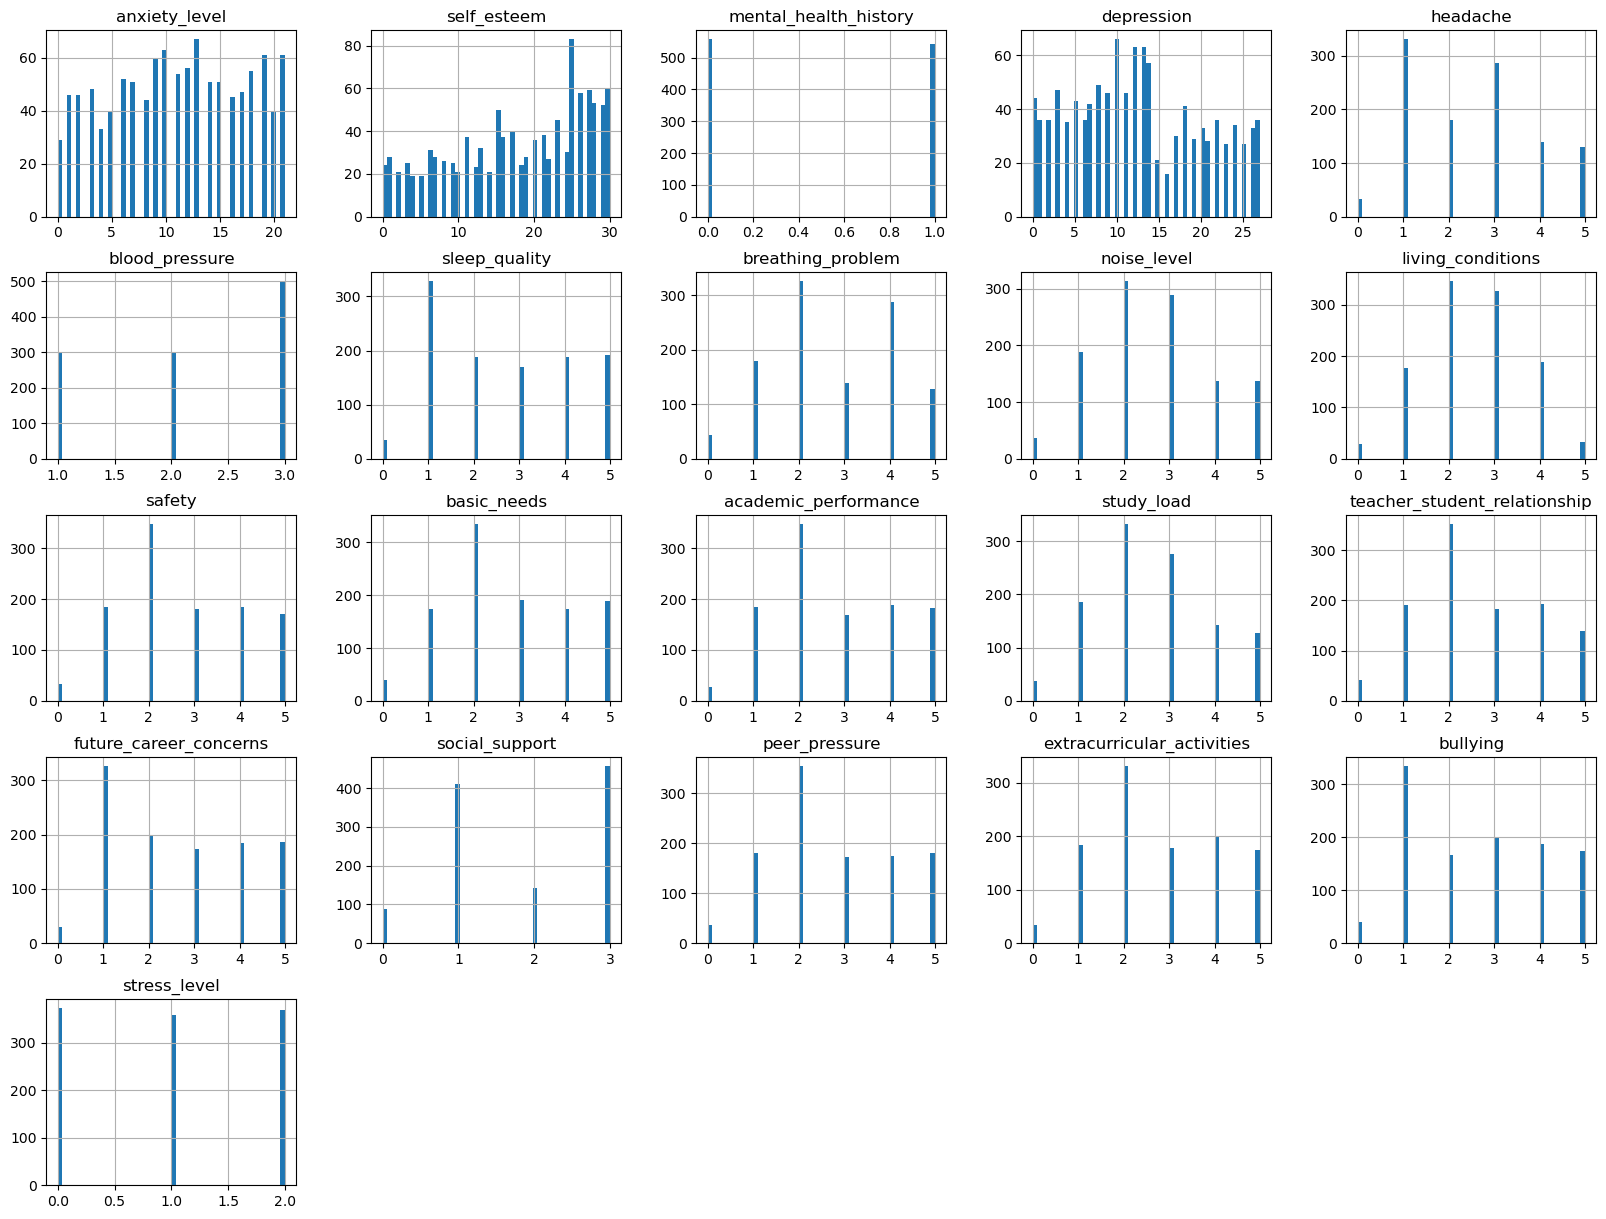

In [4]:
stress.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
corr_matrix = stress.corr(numeric_only=True)
print(corr_matrix["stress_level"].sort_values(ascending=False))

stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


In [42]:
stress_labels = stress["stress_level"].copy() 
stress_features = stress.drop("stress_level", axis=1) 
std_scaler  = StandardScaler()
stress_features_scaled = std_scaler.fit_transform(stress_features)
X = stress_features_scaled
y = stress_labels.astype(np.int64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def regress_model():
    multi_reg = LogisticRegression(multi_class="multinomial",solver="newton-cg", C=10, random_state=42)
    multi_reg.fit(X_train, y_train)
    y_pred = multi_reg.predict(X_test)
    
    #Accuracy
    multi_reg_accuracy = accuracy_score(y_test, y_pred)
    
    #Micro F1 score
    multi_reg_microf1 = f1_score(y_test, y_pred, average='micro')
    
    #Macro F1 score
    multi_reg_macrof1 = f1_score(y_test, y_pred, average='macro')
    
    return multi_reg_accuracy, multi_reg_microf1, multi_reg_macrof1

#Run your function in the cell to return the results
accuracy, microf1, macrof1 = regress_model()
print("\nAccuracy:", accuracy)
print("\nMicro F1-score:", microf1)
print("\nMacro F1-score:", macrof1)


Accuracy: 0.9

Micro F1-score: 0.9

Macro F1-score: 0.8999833166499833


In [31]:
from sklearn.model_selection import cross_validate
from statistics import mean

def cross_validation():
    multi_reg = LogisticRegression(multi_class="multinomial",solver="newton-cg", random_state=42).fit(X, y)
    
    #Cross validation evaluation
    cv_results = cross_validate(multi_reg, X, y, cv=5, scoring=("accuracy", "f1_macro", "f1_micro"))
    
    #Accuracy: use mean()
    multi_reg_accuracy = mean(cv_results['test_accuracy'])
    
    #Micro F1 score: use mean()
    multi_reg_microf1 = mean(cv_results['test_f1_macro'])
    
    #Macro F1 score: use mean()
    multi_reg_macrof1 = mean(cv_results['test_f1_macro'])
    
    return multi_reg_accuracy, multi_reg_microf1, multi_reg_macrof1

#Run your function in the cell to return the results
accuracy, microf1, macrof1 = cross_validation()
print("\nAccuracy:", accuracy)
print("\nMicro F1-score:", microf1)
print("\nMacro F1-score:", macrof1)


Accuracy: 0.8809090909090909

Micro F1-score: 0.8811590763325255

Macro F1-score: 0.8811590763325255


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=10) # change number of neighbors k to 10, 100, 200, 500
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90



In [39]:

def k_neighbor(k):
    multi_knn = KNeighborsClassifier(n_neighbors=10, algorithm=k) #brute, kd_tree,ball_tree
    multi_knn.fit(X_train, y_train)

    y_pred_mu = multi_knn.predict(X_test)

    #Accuracy
    multi_knn_accuracy = accuracy_score(y_test, y_pred)
    
    #Micro F1 score
    multi_knn_microf1 = f1_score(y_test, y_pred, average='micro')
    
    #Macro F1 score
    multi_knn_macrof1 = f1_score(y_test, y_pred, average='macro')

    return multi_knn_accuracy, multi_knn_microf1, multi_knn_macrof1

#Run your function in the cell to return the results
accuracy, microf1, macrof1, = k_neighbor('brute')
print("\nFor Brute Force:")
print("\nAccuracy:", accuracy)
print("\nMicro F1-score:", microf1)
print("\nMacro F1-score:", macrof1)
accuracy, microf1, macrof1, = k_neighbor('kd_tree')
print("\nFor kd_tree:")
print("\nAccuracy:", accuracy)
print("\nMicro F1-score:", microf1)
print("\nMacro F1-score:", macrof1)
accuracy, microf1, macrof1, = k_neighbor('ball_tree')
print("\nFor ball_tree:")
print("\nAccuracy:", accuracy)
print("\nMicro F1-score:", microf1)
print("\nMacro F1-score:", macrof1)


For Brute Force:

Accuracy: 0.896969696969697

Micro F1-score: 0.896969696969697

Macro F1-score: 0.8972102581945536

For kd_tree:

Accuracy: 0.896969696969697

Micro F1-score: 0.896969696969697

Macro F1-score: 0.8972102581945536

For ball_tree:

Accuracy: 0.896969696969697

Micro F1-score: 0.896969696969697

Macro F1-score: 0.8972102581945536


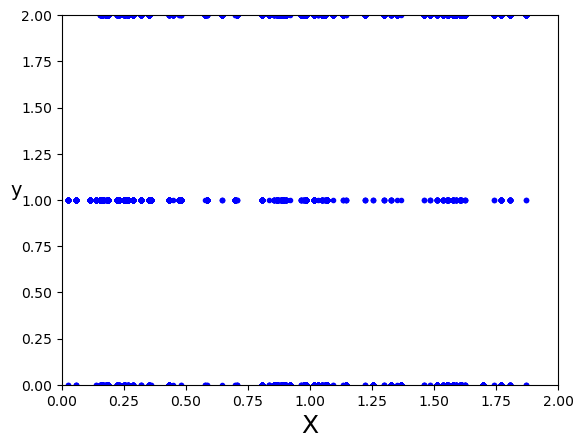

In [11]:
plt.plot(X, y, 'b.')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 2])
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsRegressor

LR_model = KNeighborsRegressor(n_neighbors=5)
LR_model.fit(X, y)

KNeighborsRegressor()

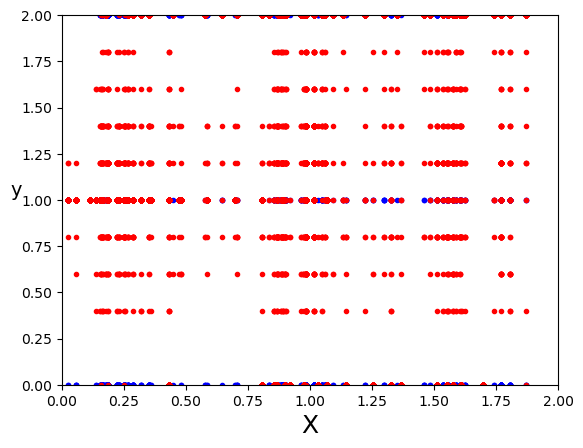

In [13]:
plt.plot(X, y, "b.")
plt.plot(X, LR_model.predict(X), "r.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 2])
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Root Mean Square Error (RMSE)
mse = mean_squared_error(y, LR_model.predict(X))
rmse = np.sqrt(mse)

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y, LR_model.predict(X))

print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Square Error (RMSE): 0.34740597158210895
Mean Absolute Error (MAE): 0.12963636363636366


In [16]:
#stepwise regression
#https://www.geeksforgeeks.org/stepwise-regression-in-python/
stressed = stress.copy()
X = stressed.iloc[:, :-1]
y = stressed.iloc[:, -1]

stress_labels = stressed["stress_level"].copy() 
stress_features = stressed.drop("stress_level", axis=1) 
std_scaler  = StandardScaler()
stress_features_scaled = std_scaler.fit_transform(stress_features)
X = stress_features_scaled
y = stress_labels.astype(np.int64)


sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                scoring='accuracy',
                                cv=None)
selected_features = sfs.fit(X, y)


# Create a dataframe with only the selected features. features: physioloical factors
selected_columns = [ "headache", "blood_pressure", "sleep_quality", "breathing_problem"]
df_selected = stressed[selected_columns]
 
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)
 
# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
 
# Make predictions using the test set
y_pred = logreg.predict(X_test)
step_reg_accuracy = accuracy_score(y_test, y_pred)
 
# Evaluate the model performance
#print(y_pred) #have too many lol
print(step_reg_accuracy)

0.9212121212121213


In [17]:
# Create a dataframe with only the selected features. features: Phychological Factors 
selected_columns = [ "anxiety_level", "mental_health_history", "depression", "self_esteem"]
df_selected = stressed[selected_columns]
 
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)
 
# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
 
# Make predictions using the test set
y_pred = logreg.predict(X_test)
step_reg_accuracy = accuracy_score(y_test, y_pred)
 
# Evaluate the model performance
print(y_pred)
print(step_reg_accuracy)

[2 0 1 1 0 1 2 0 1 2 0 0 0 2 1 0 0 2 1 0 1 1 0 1 1 2 1 0 0 0 2 2 2 0 0 1 1
 1 2 2 2 0 1 1 2 0 2 1 0 0 1 0 0 0 1 1 2 0 1 1 2 0 0 0 2 0 2 1 2 1 1 1 2 1
 0 1 1 0 1 1 1 0 0 1 1 2 2 2 2 1 0 2 0 1 2 1 1 0 1 1 2 0 0 2 1 1 1 2 1 2 2
 2 1 0 1 1 2 2 0 0 2 1 0 1 2 2 0 2 0 2 2 1 1 0 0 2 1 2 2 2 0 2 0 1 0 1 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 0 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 2 1 2 1 2 1 2 0 1 1 1 1 1 2 2 1 2 0 1 2 2 2 2 0 2 1 2 0 0 1 2 0 0 1 1 1
 0 1 0 0 1 2 1 0 2 0 2 1 1 2 2 2 0 0 1 0 2 0 0 2 2 0 0 0 0 2 0 2 2 1 1 2 1
 0 0 2 0 1 1 1 2 2 1 0 1 1 2 1 2 0 0 0 1 2 0 1 1 2 1 2 2 1 0 1 0 0 1 0 2 2
 1 1 1 2 0 0 2 2 0 2 0 2 2 2 2 2 1 2 0 1 1 1 1 1 2 2 0 2 0 1 0 0 1 1]
0.9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Create a dataframe with only the selected features. features: Academic Factors 
selected_columns = ["academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns"]
df_selected = stress[selected_columns]
 
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)
 
# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
 
# Make predictions using the test set
y_pred = logreg.predict(X_test)
step_reg_accuracy = accuracy_score(y_test, y_pred)
 
# Evaluate the model performance
print(y_pred)
print(step_reg_accuracy)

[2 0 1 1 0 1 2 0 1 0 0 0 0 2 2 0 0 2 1 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 0 1 1
 1 2 2 2 0 1 1 2 0 2 1 0 0 1 0 0 0 1 1 2 2 1 1 2 0 2 0 1 0 0 1 2 1 2 1 1 1
 0 1 1 0 1 2 1 0 0 1 1 1 2 2 2 1 0 1 0 1 0 1 1 0 1 1 2 0 0 2 2 2 1 2 1 2 2
 2 1 0 2 1 2 2 0 0 2 1 1 1 2 1 0 2 0 2 2 1 1 0 0 2 1 2 2 2 0 2 0 1 0 1 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 1 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 1 1 2 1 2 1 2 1 1 1 1 1 1 2 2 1 1 0 1 2 2 2 1 0 1 1 2 0 0 1 2 2 0 1 1 1
 1 1 0 0 1 1 1 0 2 0 2 1 1 2 2 2 0 0 2 0 2 0 0 2 2 1 0 0 0 2 0 2 2 1 1 2 1
 0 0 2 0 1 1 1 2 2 1 0 1 1 2 2 2 0 1 0 1 2 1 1 1 2 1 2 2 1 0 1 0 0 1 0 2 2
 1 1 1 2 0 0 2 2 0 2 0 2 2 2 2 2 1 2 0 1 1 1 1 1 2 2 0 2 0 1 0 0 1 1]
0.8878787878787879


In [19]:
# Create a dataframe with only the selected features. features: Social Factors 
selected_columns = ["social_support", "peer_pressure", "extracurricular_activities", "bullying", "stress_level"]
df_selected = stress[selected_columns]
 
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)
 
# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
 
# Make predictions using the test set
y_pred = logreg.predict(X_test)
step_reg_accuracy = accuracy_score(y_test, y_pred)
 
# Evaluate the model performance
print(y_pred)
print(step_reg_accuracy)

[2 0 1 1 0 1 2 0 1 1 0 0 0 2 0 0 0 2 1 0 1 2 0 1 1 2 1 0 0 0 2 2 2 0 0 1 0
 1 2 2 2 0 1 0 2 0 2 2 0 0 1 0 0 0 1 1 2 0 1 1 2 0 1 0 2 0 2 1 2 0 1 1 1 1
 0 2 1 0 1 1 1 0 0 1 1 0 2 2 2 1 0 2 0 1 0 1 0 0 1 1 2 0 0 2 1 0 1 2 1 2 2
 2 1 0 2 2 2 2 0 0 2 1 1 1 2 2 0 2 0 2 2 1 2 0 0 2 1 2 2 2 0 2 0 1 0 0 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 2 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 1 1 2 1 2 1 2 0 1 1 0 1 1 2 2 1 2 0 1 2 2 2 1 0 2 1 2 0 0 1 2 2 0 1 1 1
 0 1 0 0 1 1 1 0 2 0 2 1 1 2 2 2 0 0 0 0 2 0 0 2 2 1 0 0 0 2 0 2 2 1 1 2 1
 0 0 2 0 1 1 1 2 2 1 0 1 1 2 1 2 0 2 0 1 2 2 1 1 2 1 2 2 1 0 1 0 0 1 0 2 2
 1 1 0 2 0 0 2 2 0 2 0 2 2 2 2 2 1 2 0 1 1 1 0 1 2 2 0 2 0 1 0 0 0 2]
1.0


In [20]:
# Create a dataframe with only the selected features. features: Environmental Factors 
selected_columns = [ "noise_level", "living_conditions", "basic_needs"]
df_selected = stress[selected_columns]
 
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)
 
# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
 
# Make predictions using the test set
y_pred = logreg.predict(X_test)
step_reg_accuracy = accuracy_score(y_test, y_pred)
 
# Evaluate the model performance
print(y_pred)
print(step_reg_accuracy)

[2 0 1 1 0 1 2 0 1 1 0 0 0 2 2 0 0 2 1 0 1 1 0 1 1 2 1 0 0 0 2 2 2 0 0 1 0
 1 2 2 2 0 1 2 2 0 2 2 0 0 1 0 0 0 1 1 2 1 1 1 1 0 1 0 2 0 1 1 2 2 0 1 1 1
 0 2 1 0 1 1 1 0 0 1 1 2 2 2 2 1 0 1 0 1 2 1 0 0 1 1 2 0 0 2 1 2 1 2 1 2 2
 2 1 0 2 0 2 2 0 0 2 1 2 1 2 1 0 2 0 2 2 1 1 0 0 2 1 2 2 2 0 2 0 1 0 0 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 0 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 0 1 2 1 2 1 2 1 1 1 1 1 1 2 2 1 1 0 1 2 2 2 2 0 1 1 2 0 0 1 2 1 0 1 1 1
 1 1 0 0 1 1 1 0 1 0 2 1 1 2 2 2 0 0 2 0 2 0 0 2 2 1 0 0 0 2 0 2 2 1 1 2 1
 0 0 2 0 1 1 1 2 2 1 0 1 1 2 2 1 0 0 0 1 2 1 1 1 2 1 2 2 1 0 1 0 0 1 0 2 2
 1 1 1 0 0 0 2 2 0 2 0 2 2 2 2 2 1 2 0 1 1 1 1 1 2 2 0 2 0 0 0 0 2 1]
0.8878787878787879


In [21]:
#Support Vector Regression
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d

X = stress.iloc[:,1:2].values.astype(float)
y = stress.iloc[:,2:3].values.astype(float)#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)#4 Fitting the Support Vector Regression Model to the dataset
# # Create your support vector regressor herefrom sklearn.svm import SVR# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)#5 Predicting a new result
y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
print(y_pred)

[0.3005156]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


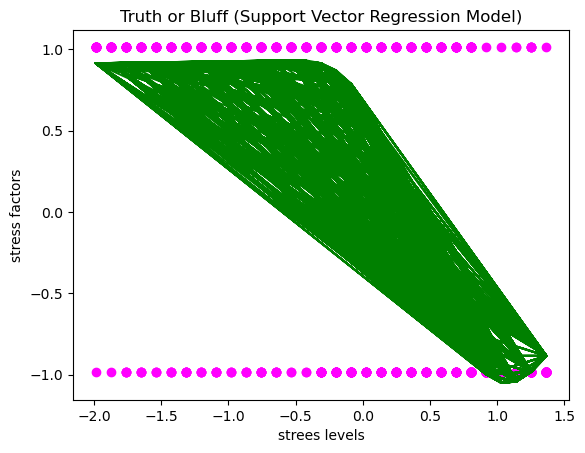

In [22]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('strees levels')
plt.ylabel('stress factors')
plt.show()

In [43]:
def support_vector():
    multi_svm = SVC(kernel='rbf', random_state=42, decision_function_shape='ovr').fit(X_train, y_train)

    y_pred = multi_svm.predict(X_test)
    
    #Accuracy
    multi_svm_accuracy = accuracy_score(y_test, y_pred)
    
    #Micro F1 score
    multi_svm_microf1 = f1_score(y_test, y_pred, average='micro')
    
    #Macro F1 score
    multi_svm_macrof1 = f1_score(y_test, y_pred, average='macro')
    
    return multi_svm_accuracy, multi_svm_microf1, multi_svm_macrof1

#Run your function in the cell to return the results
accuracy, microf1, macrof1 = support_vector()
print("\nAccuracy:", accuracy)
print("\nMicro F1-score:", microf1)
print("\nMacro F1-score:", macrof1)


Accuracy: 0.8909090909090909

Micro F1-score: 0.8909090909090909

Macro F1-score: 0.8919559197996595
